<a href="https://colab.research.google.com/github/QamalMaqsat/data-science-from-scratch/blob/master/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colaboratory!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.price.describe()

count    13200.000000
mean       112.276178
std        149.175995
min          8.000000
25%         50.000000
50%         71.850000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [5]:
mean = df.price_per_sqft.mean()

112.27617765151514

In [6]:
std = df.price_per_sqftw.std()

149.17599517809637

<Axes: xlabel='price', ylabel='Count'>

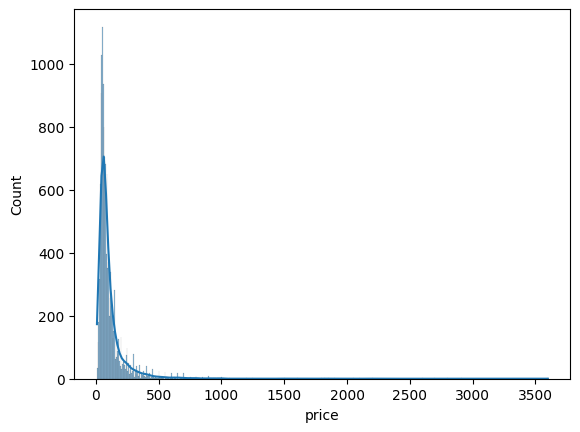

In [9]:
sn.histplot(df.price, kde= True)

In [13]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001 , 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [15]:
outliers = df[(df.price_per_sqft>lower_limit)|(df.price_per_sqft<upper_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1901,other,3 BHK,1690.0,3.0,75.00,3,4437
4066,other,4 BHK,3000.0,5.0,100.00,4,3333
12279,Garudachar Palya,2 BHK,1154.0,2.0,51.80,2,4488
4988,Old Madras Road,5 BHK,4500.0,7.0,294.00,5,6533
1841,other,2 Bedroom,1350.0,2.0,80.00,2,5925
11296,Electronic City,2 BHK,1125.0,2.0,32.49,2,2888
7552,Bisuvanahalli,2 BHK,945.0,2.0,33.00,2,3492
421,Balagere,3 BHK,1590.0,3.0,79.00,3,4968
4394,BTM Layout,6 Bedroom,3300.0,6.0,165.00,6,5000
11853,Doddaballapur,4 Bedroom,2400.0,3.0,200.00,4,8333


In [16]:
df2 = df[(df.price_per_sqft>lower_limit)&(df.price_per_sqft<upper_limit)]
df2.shape

(13172, 7)

In [17]:
df.shape

(13200, 7)

In [20]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [23]:
df2[(df2.price_per_sqft>max_limit)|(df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3500,Kundalahalli,1 BHK,2400.00,1.0,650.0,1,27083
978,Rajaji Nagar,4 Bedroom,315.00,4.0,90.0,4,28571
12640,other,3 BHK,2777.29,5.0,649.0,3,23368
9873,other,3 Bedroom,2400.00,6.0,775.0,3,32291
8861,Cunningham Road,5 Bedroom,2925.00,5.0,936.0,5,32000
4993,other,6 Bedroom,825.00,6.0,400.0,6,48484
8595,other,3 Bedroom,1200.00,2.0,300.0,3,25000
6391,other,5 Bedroom,4000.00,4.0,1000.0,5,25000
5909,other,5 Bedroom,1240.00,5.0,300.0,5,24193
11838,Vijayanagar,4 Bedroom,1500.00,4.0,360.0,4,24000


In [30]:
df3 = df2[(df2.price_per_sqft<max_limit)&(df2.price_per_sqft>min_limit)]
df3.shape

(13047, 7)

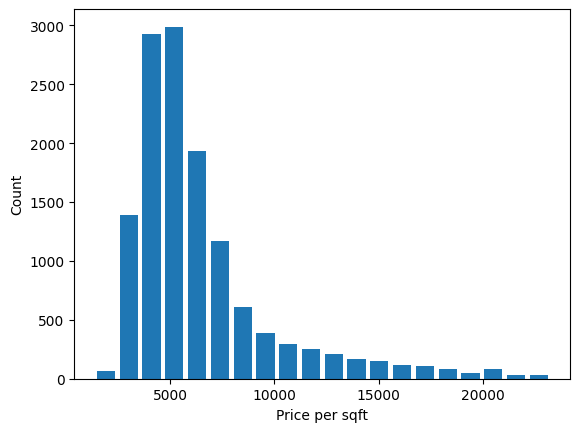

In [38]:
plt.hist(df3.price_per_sqft, bins=20,rwidth = 0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.show()

In [42]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-42-70754eb1335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zcore,zscore
9812,Hulimavu,2 BHK,1011.0,2.0,38.00,2,3758,-0.701676,-0.701676
11540,other,4 Bedroom,4304.0,4.0,699.00,4,16240,2.312557,2.312557
10037,Whitefield,2 BHK,1180.0,2.0,77.00,2,6525,-0.033483,-0.033483
8060,Horamavu Agara,4 Bedroom,1250.0,4.0,100.00,4,8000,0.322709,0.322709
7801,Bannerghatta Road,2 BHK,1215.0,2.0,68.00,2,5596,-0.257824,-0.257824
6583,Hennur,3 BHK,1260.0,2.0,52.00,3,4126,-0.612809,-0.612809
3375,Marathahalli,4 BHK,3895.0,4.0,220.00,4,5648,-0.245267,-0.245267
13183,Vidyaranyapura,5 Bedroom,774.0,5.0,70.00,5,9043,0.574580,0.574580
3423,Kathriguppe,3 BHK,1350.0,2.0,87.01,3,6445,-0.052802,-0.052802
10991,other,2 BHK,1100.0,2.0,38.50,2,3500,-0.763979,-0.763979


In [43]:
outliers_z = df2[(df2.zscore<-4)|(df2.zscore>4)]
outliers_z.shape

(125, 9)

In [44]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zcore,zscore
3136,other,4 Bedroom,1200.0,4.0,350.0,4,29166,5.434010,5.434010
2618,Malleshwaram,7 Bedroom,3000.0,4.0,900.0,7,30000,5.635409,5.635409
8082,Nagarbhavi,4 Bedroom,1200.0,3.0,340.0,4,28333,5.232851,5.232851
3420,other,3 Bedroom,1350.0,3.0,380.0,3,28148,5.188176,5.188176
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994,4.930994


In [48]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 9)

In [49]:
df2.shape[0] - df4.shape[0]


125